### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [231]:
import numpy as np
import pandas as pd
%matplotlib inline

In [232]:
vehicle_df = pd.read_csv('vehicle.csv')

print (vehicle_df.shape)

data = vehicle_df.dropna (axis=0)
print (data.shape)
print (data.info)
data.head().T



(846, 19)
(813, 19)
<bound method DataFrame.info of      compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
6             97         43.0                  73.0         173.0   
7             90         43.0                  66.0         157.0   
8             86         34.0                  62.0         140.0   
10            86         36.0                  70.0         143.0   
11            90         34.0                  66.0         136.0   
12            88         46.0                  74.0         171.0   
13            89         42.0                  85.0         144.0   
14            94         49.0                  79.0

,0,1,2,3,4
compactness,95,91,104,93,85
circularity,48,41,50,41,44
distance_circularity,83,84,106,82,70
radius_ratio,178,141,209,159,205
pr.axis_aspect_ratio,72,57,66,63,103
max.length_aspect_ratio,10,9,10,9,52
scatter_ratio,162,149,207,144,149
elongatedness,42,45,32,46,45
pr.axis_rectangularity,20,19,23,19,19
max.length_rectangularity,159,143,158,143,144


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

car    413
bus    205
van    195
Name: class, dtype: int64


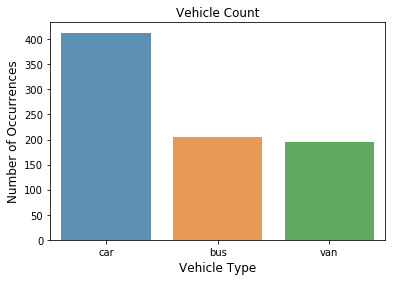

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt

class_count = data['class'].value_counts()

print (class_count)

sns.barplot(class_count.index, class_count.values, alpha=0.8)

plt.title('Vehicle Count')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Vehicle Type', fontsize=12)
plt.show()


### Check for any missing values in the data 

In [234]:
df_attr = data.drop('class', axis=1)
df_attr.head().T

,0,1,2,3,4
compactness,95.0,91.0,104.0,93.0,85.0
circularity,48.0,41.0,50.0,41.0,44.0
distance_circularity,83.0,84.0,106.0,82.0,70.0
radius_ratio,178.0,141.0,209.0,159.0,205.0
pr.axis_aspect_ratio,72.0,57.0,66.0,63.0,103.0
max.length_aspect_ratio,10.0,9.0,10.0,9.0,52.0
scatter_ratio,162.0,149.0,207.0,144.0,149.0
elongatedness,42.0,45.0,32.0,46.0,45.0
pr.axis_rectangularity,20.0,19.0,23.0,19.0,19.0
max.length_rectangularity,159.0,143.0,158.0,143.0,144.0


In [235]:
df_attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 18 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [261]:
# based on the information above, there are no missing values

### 3. Standardize the data 

In [237]:
df_attr.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [238]:
# convert all attributes to z scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_attr)
df_attr_z = scaler.transform(df_attr)
df_attr_z = pd.DataFrame(df_attr_z)

colNames = df_attr.columns
df_attr_z.columns = colNames
df_attr_z.head()


C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


### K - Means Clustering

### 4. Assign a dummy array called distortion

In [239]:
# Creating an array distortion
distortion = []
distortion

[]

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [240]:
df_attr_z.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [241]:
df_attr_z.shape

(813, 18)

In [242]:
#Initial a list to track SSE for KMeans with different K
from sklearn.cluster import KMeans

x_z = df_attr_z.copy()

sse_df = pd.DataFrame(columns=['K', 'SSE'])

for i in range (1,10):
    #Initialize KMeans
    km = KMeans(n_clusters=i)
    km.fit(df_attr_z)
    df_attr_z['k_'+str(i)] = km.predict(df_attr_z)
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]
    distortion.append (km.inertia_)

distortion

[14634.0,
 8623.13697598644,
 7057.098818359817,
 5765.184267495013,
 5323.009172803779,
 4911.231997526414,
 4492.360237096078,
 4222.174543132076,
 4016.7271644767234]

In [243]:
print (x_z.shape)

(813, 18)


### 6. Plotting Elbow/ Scree Plot

In [244]:
sse_df

,K,SSE
0,1.0,14634.000000
1,2.0,8623.136976
2,3.0,7057.098818
3,4.0,5765.184267
4,5.0,5323.009173
5,6.0,4911.231998
6,7.0,4492.360237
7,8.0,4222.174543
8,9.0,4016.727164


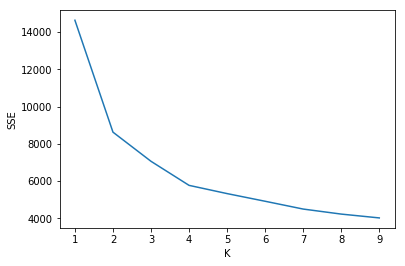

In [245]:
sns.lineplot (x='K', y = 'SSE', data = sse_df)

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [246]:
# From elbow graph, optimal cluster seems to be 4

In [247]:
x_z.shape

(813, 18)

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [248]:
km = KMeans(n_clusters=4)
km.fit(x_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [249]:
km.cluster_centers_


#centroid.columns = colNames

#centroid

array([[-8.73939377e-01, -4.90666958e-01, -8.19987596e-01,
        -1.00914774e+00, -4.88356546e-01, -2.75961304e-01,
        -7.59559699e-01,  8.28143534e-01, -7.31863992e-01,
        -4.54863559e-01, -7.72863866e-01, -7.64634145e-01,
        -3.79292105e-01,  6.60977993e-01, -1.09968514e-01,
        -2.97172612e-01, -9.41479276e-01, -9.74511472e-01],
       [-1.77926274e-01, -6.12019616e-01, -2.97587802e-01,
         2.04512354e-02,  2.01668080e-01, -1.80273603e-01,
        -4.31799185e-01,  2.86319889e-01, -4.63195107e-01,
        -5.74020947e-01, -3.97747522e-01, -4.35651397e-01,
        -6.41055881e-01, -7.09095913e-01, -2.86420482e-02,
         5.37687678e-02,  9.63652967e-01,  8.14107010e-01],
       [ 1.15736176e+00,  1.18688991e+00,  1.21376707e+00,
         9.73764988e-01,  9.46906393e-02,  2.19180218e-01,
         1.30158336e+00, -1.21649970e+00,  1.30627647e+00,
         1.10069002e+00,  1.20916828e+00,  1.31287479e+00,
         1.09370231e+00, -1.03892856e-01,  1.58104393e

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [250]:
colNames = x_z.columns
centroid = pd.DataFrame(km.cluster_centers_)

centroid


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.873939,-0.490667,-0.819988,-1.009148,-0.488357,-0.275961,-0.759560,0.828144,-0.731864,-0.454864,-0.772864,-0.764634,-0.379292,0.660978,-0.109969,-0.297173,-0.941479,-0.974511
1,-0.177926,-0.612020,-0.297588,0.020451,0.201668,-0.180274,-0.431799,0.286320,-0.463195,-0.574021,-0.397748,-0.435651,-0.641056,-0.709096,-0.028642,0.053769,0.963653,0.814107
2,1.157362,1.186890,1.213767,0.973765,0.094691,0.219180,1.301583,-1.216500,1.306276,1.100690,1.209168,1.312875,1.093702,-0.103893,0.158104,0.269747,-0.001701,0.187217
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


Hint: Use pd.Dataframe function 

In [251]:
centroid.columns = colNames
centroid

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.873939,-0.490667,-0.819988,-1.009148,-0.488357,-0.275961,-0.759560,0.828144,-0.731864,-0.454864,-0.772864,-0.764634,-0.379292,0.660978,-0.109969,-0.297173,-0.941479,-0.974511
1,-0.177926,-0.612020,-0.297588,0.020451,0.201668,-0.180274,-0.431799,0.286320,-0.463195,-0.574021,-0.397748,-0.435651,-0.641056,-0.709096,-0.028642,0.053769,0.963653,0.814107
2,1.157362,1.186890,1.213767,0.973765,0.094691,0.219180,1.301583,-1.216500,1.306276,1.100690,1.209168,1.312875,1.093702,-0.103893,0.158104,0.269747,-0.001701,0.187217
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


### Use kmeans.labels_ function to print out the labels of the classes

In [253]:
km.labels_

array([1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2,
       1, 0, 2, 2, 0, 0, 1, 1, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0,
       0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2,
       1, 0, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2, 0, 0, 2,
       0, 0, 2, 0, 3, 1, 1, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 2, 2, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 3, 0, 1, 0, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 2, 2,
       1, 2, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 2, 1, 0, 1,
       2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1,
       2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0,
       1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0,
       0, 2, 0, 0, 3, 0, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 0,

In [256]:
df_attr['ClusterLabel'] = km.labels_
df_attr.head().T

,0,1,2,3,4
compactness,95.0,91.0,104.0,93.0,85.0
circularity,48.0,41.0,50.0,41.0,44.0
distance_circularity,83.0,84.0,106.0,82.0,70.0
radius_ratio,178.0,141.0,209.0,159.0,205.0
pr.axis_aspect_ratio,72.0,57.0,66.0,63.0,103.0
max.length_aspect_ratio,10.0,9.0,10.0,9.0,52.0
scatter_ratio,162.0,149.0,207.0,144.0,149.0
elongatedness,42.0,45.0,32.0,46.0,45.0
pr.axis_rectangularity,20.0,19.0,23.0,19.0,19.0
max.length_rectangularity,159.0,143.0,158.0,143.0,144.0


## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [272]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [293]:
colNames = ['a1', 'a2', 'b1', 'b2', 'c1', 'c2']
data = np.array([[a],[b],[c]])


In [294]:
df = pd.concat([pd.DataFrame(a), pd.DataFrame(b), pd.DataFrame(c)], axis=0) 
#df.columns = colNames
df.shape
df.head()

,0,1
0,10.672905,1.035644
1,9.437364,0.633516
2,11.498198,0.151291
3,11.739057,-3.095366
4,11.527787,2.052554


### 10. Use scatter matrix to print all the 3 distributions

C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


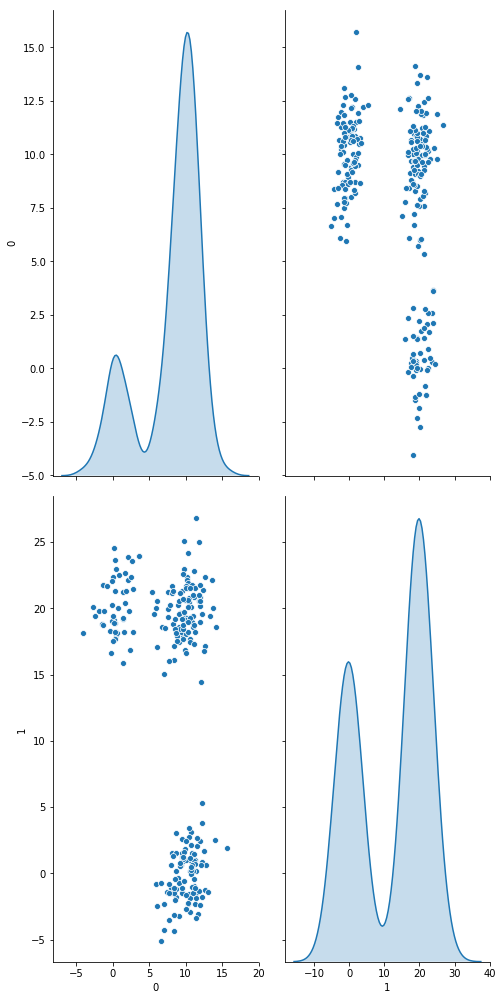

In [295]:
import seaborn as sns
sns.pairplot(df, size=7,aspect=0.5 , diag_kind='kde')


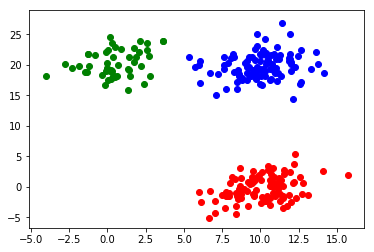

In [288]:
plt.scatter(x="a1", y = "a2", data=df, c="red")
plt.scatter(x="b1", y = "b2", data=df, c="green")
plt.scatter(x="c1", y = "c2", data=df, c="blue")

### 11. Find out the linkage matrix

In [301]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

Use ward as linkage metric and distance as Eucledian

In [296]:
Z = linkage(df, method='ward', metric='euclidean')


In [304]:
c, coph_dists = cophenet(Z , pdist(df))
print(c)

0.9553031390579283


In [300]:
Z

array([[1.00000000e+01, 6.50000000e+01, 1.53693321e-02, 2.00000000e+00],
       [5.00000000e+00, 2.20000000e+01, 3.74901808e-02, 2.00000000e+00],
       [1.40000000e+01, 4.30000000e+01, 4.16272277e-02, 2.00000000e+00],
       [1.18000000e+02, 1.39000000e+02, 4.84851547e-02, 2.00000000e+00],
       [1.15000000e+02, 1.23000000e+02, 5.10983091e-02, 2.00000000e+00],
       [1.03000000e+02, 1.48000000e+02, 7.29320464e-02, 2.00000000e+00],
       [8.90000000e+01, 2.51000000e+02, 1.05762343e-01, 3.00000000e+00],
       [1.10000000e+02, 1.36000000e+02, 1.18729413e-01, 2.00000000e+00],
       [4.40000000e+01, 9.40000000e+01, 1.19866338e-01, 2.00000000e+00],
       [1.54000000e+02, 1.81000000e+02, 1.20578724e-01, 2.00000000e+00],
       [1.05000000e+02, 1.29000000e+02, 1.37408144e-01, 2.00000000e+00],
       [0.00000000e+00, 7.80000000e+01, 1.38335143e-01, 2.00000000e+00],
       [2.15000000e+02, 2.22000000e+02, 1.42834272e-01, 2.00000000e+00],
       [3.00000000e+01, 5.20000000e+01, 1.45498697e

### 12. Plot the dendrogram for the consolidated dataframe

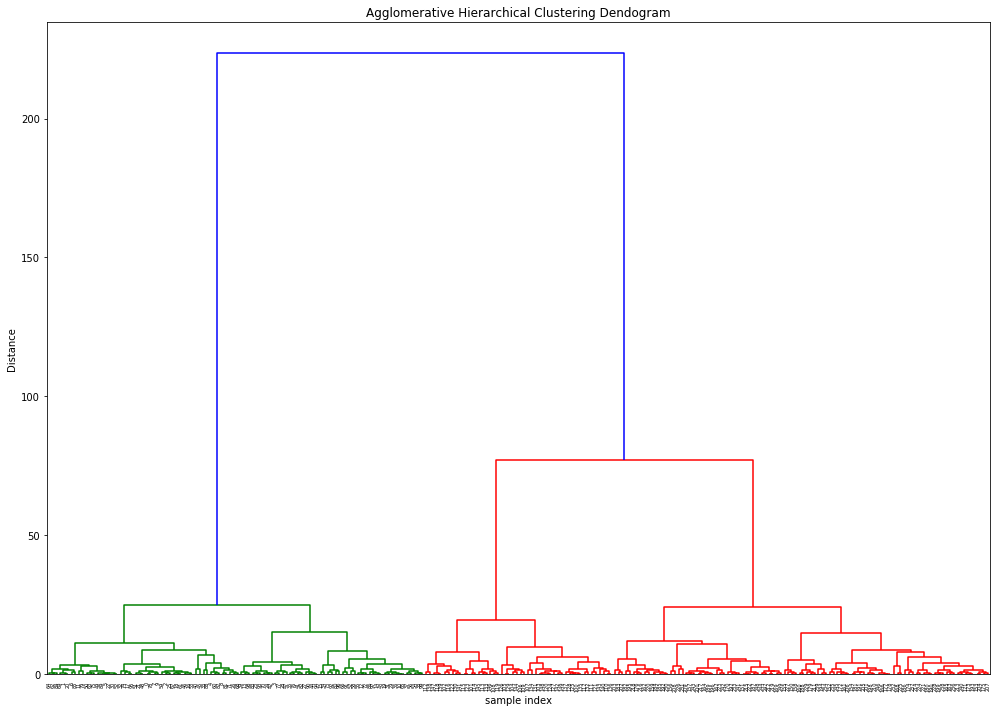

In [310]:
plt.figure(figsize=(14, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z)
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

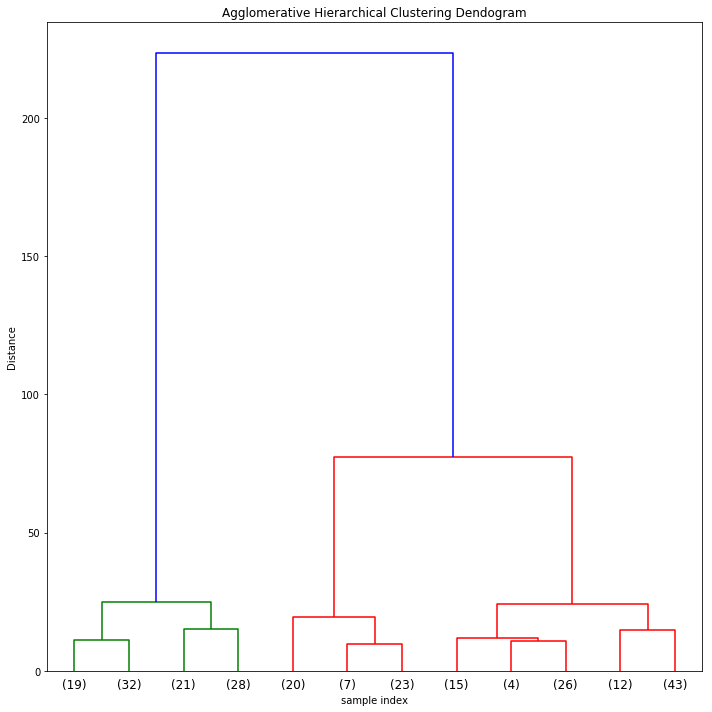

In [311]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, p=12, truncate_mode='lastp')
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

From the dendrogram, we will assume optimal distance as 50 for 3 clusters. It would be somewhere in the range : 30 to 70

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [316]:
from scipy.cluster.hierarchy import fcluster

In [322]:
cluster_groups = fcluster(Z, 50, criterion='distance', depth=3, R=None, monocrit=None)
print (cluster_groups)
df['Cluster_Group'] = cluster_groups
df.head()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


,0,1,Cluster_Group
0,10.672905,1.035644,1
1,9.437364,0.633516,1
2,11.498198,0.151291,1
3,11.739057,-3.095366,1
4,11.527787,2.052554,1


In [323]:
pd.value_counts(df['Cluster_Group'])

3    100
1    100
2     50
Name: Cluster_Group, dtype: int64

### Use matplotlib to visually observe the clusters in 2D space 

In [325]:
import matplotlib.pyplot as plt


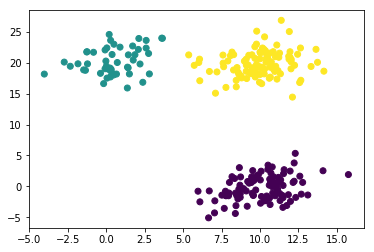

In [327]:
plt.scatter(df.iloc[:,0],df.iloc[:,1], c=cluster_groups)